In [1]:
import pandas as pd
from rdkit import Chem
from pathlib import Path

In [18]:
mol_dir = 'scored/'
name = 'generated_molecules_10002_True_charged_GNN_baseline_[]_scored.csv'
mol_data = pd.read_csv(Path('./') / mol_dir / name)

In [19]:
# Get the minimal size of the molecules

mol_data['size'] = mol_data['smiles'].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms() if Chem.MolFromSmiles(x) is not None else 1000)

mol_data['size'].value_counts()

21    860
22    831
23    819
20    786
24    754
25    676
19    636
26    623
18    529
27    499
17    433
28    372
16    349
29    322
30    264
15    248
14    211
31    163
13    114
32    100
12     93
33     72
11     59
34     48
35     31
36     23
10     18
9      18
37     14
38      8
8       6
41      5
40      4
39      3
5       2
2       1
46      1
7       1
44      1
Name: size, dtype: int64

In [54]:
# Visualize molecules as a grid
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

def visualize_smiles_grid(smiles_list, mols_per_row=5, mol_img_size=(300, 300)):
    """
    Visualize a dataset of SMILES strings in a grid.
    
    Parameters:
    - smiles_list: A list of SMILES strings
    - mols_per_row: Number of molecules per row in the grid
    - mol_img_size: A tuple representing the size of each molecule image
    """
    
    # Convert SMILES strings to RDKit molecule objects
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    
    # Create a grid image of the molecules
    img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=mol_img_size)
    
    # Display the image
    return img

In [55]:
mol_data[mol_data['QED'] > 0.947]

,smiles,SA,logP,QED,weight,n_rings
314,COc1c(Cl)cc(Cl)cc1NC(=O)c1cnn(C)c1,2.145180,2.9878,0.947736,300.145,2
588,O=S(=O)(Nc1cccnc1)c1ccc(Cl)c(Cl)c1,1.844583,3.1892,0.947010,303.170,2
826,CCC(NC(=O)N1CCn2ccnc2C1)c1ccccc1F,2.900936,2.6987,0.947461,302.353,3
852,CC(NC(=O)c1csnn1)c1cccc(C(F)(F)F)c1,2.740610,3.0479,0.947701,301.293,2
919,Cn1ncnc1NC(=O)N1CCCC(C)(Cc2ccccc2)C1,3.136767,2.6918,0.947362,313.405,3


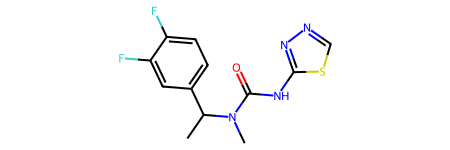

In [51]:
Chem.MolFromSmiles('CC(c1ccc(F)c(F)c1)N(C)C(=O)Nc1nncs1')

c:\Users\goupi\.conda\envs\torch_geometric\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


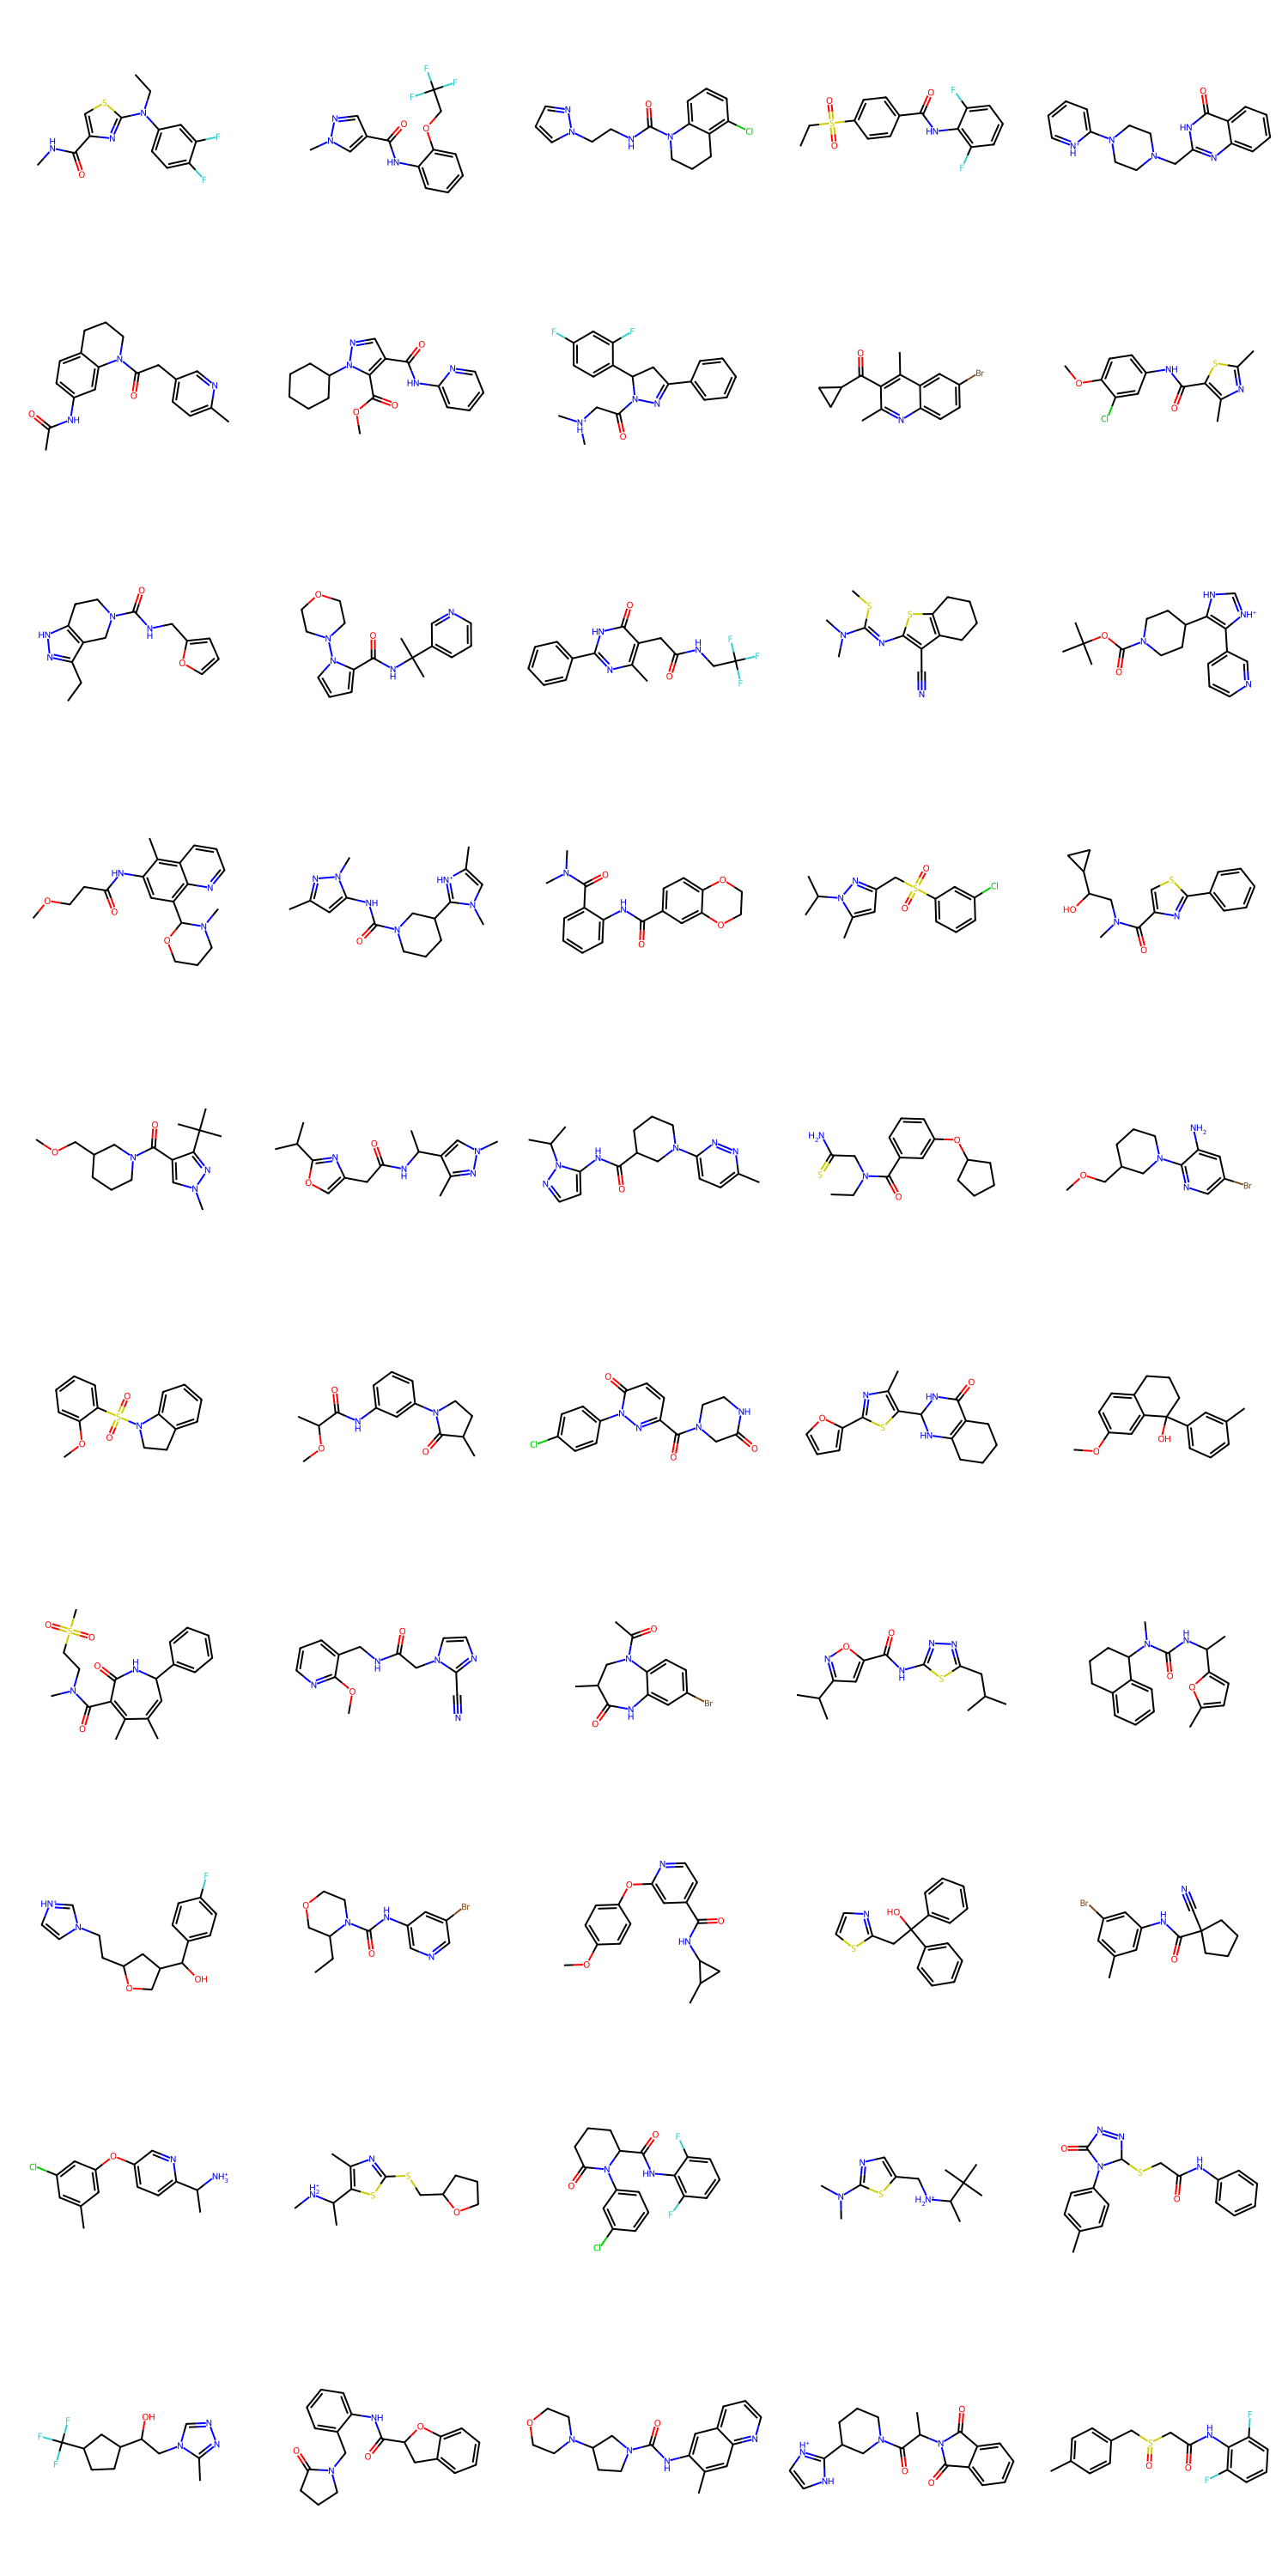

In [37]:
visualize_smiles_grid(mol_data['smiles'].tolist())

In [24]:
mol_dir = 'scored/'
name = 'generated_molecules_10000_True_charged_GNN_baseline_[]_scored.csv'
mol_data = pd.read_csv(Path('./') / mol_dir / name)

c:\Users\goupi\.conda\envs\torch_geometric\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


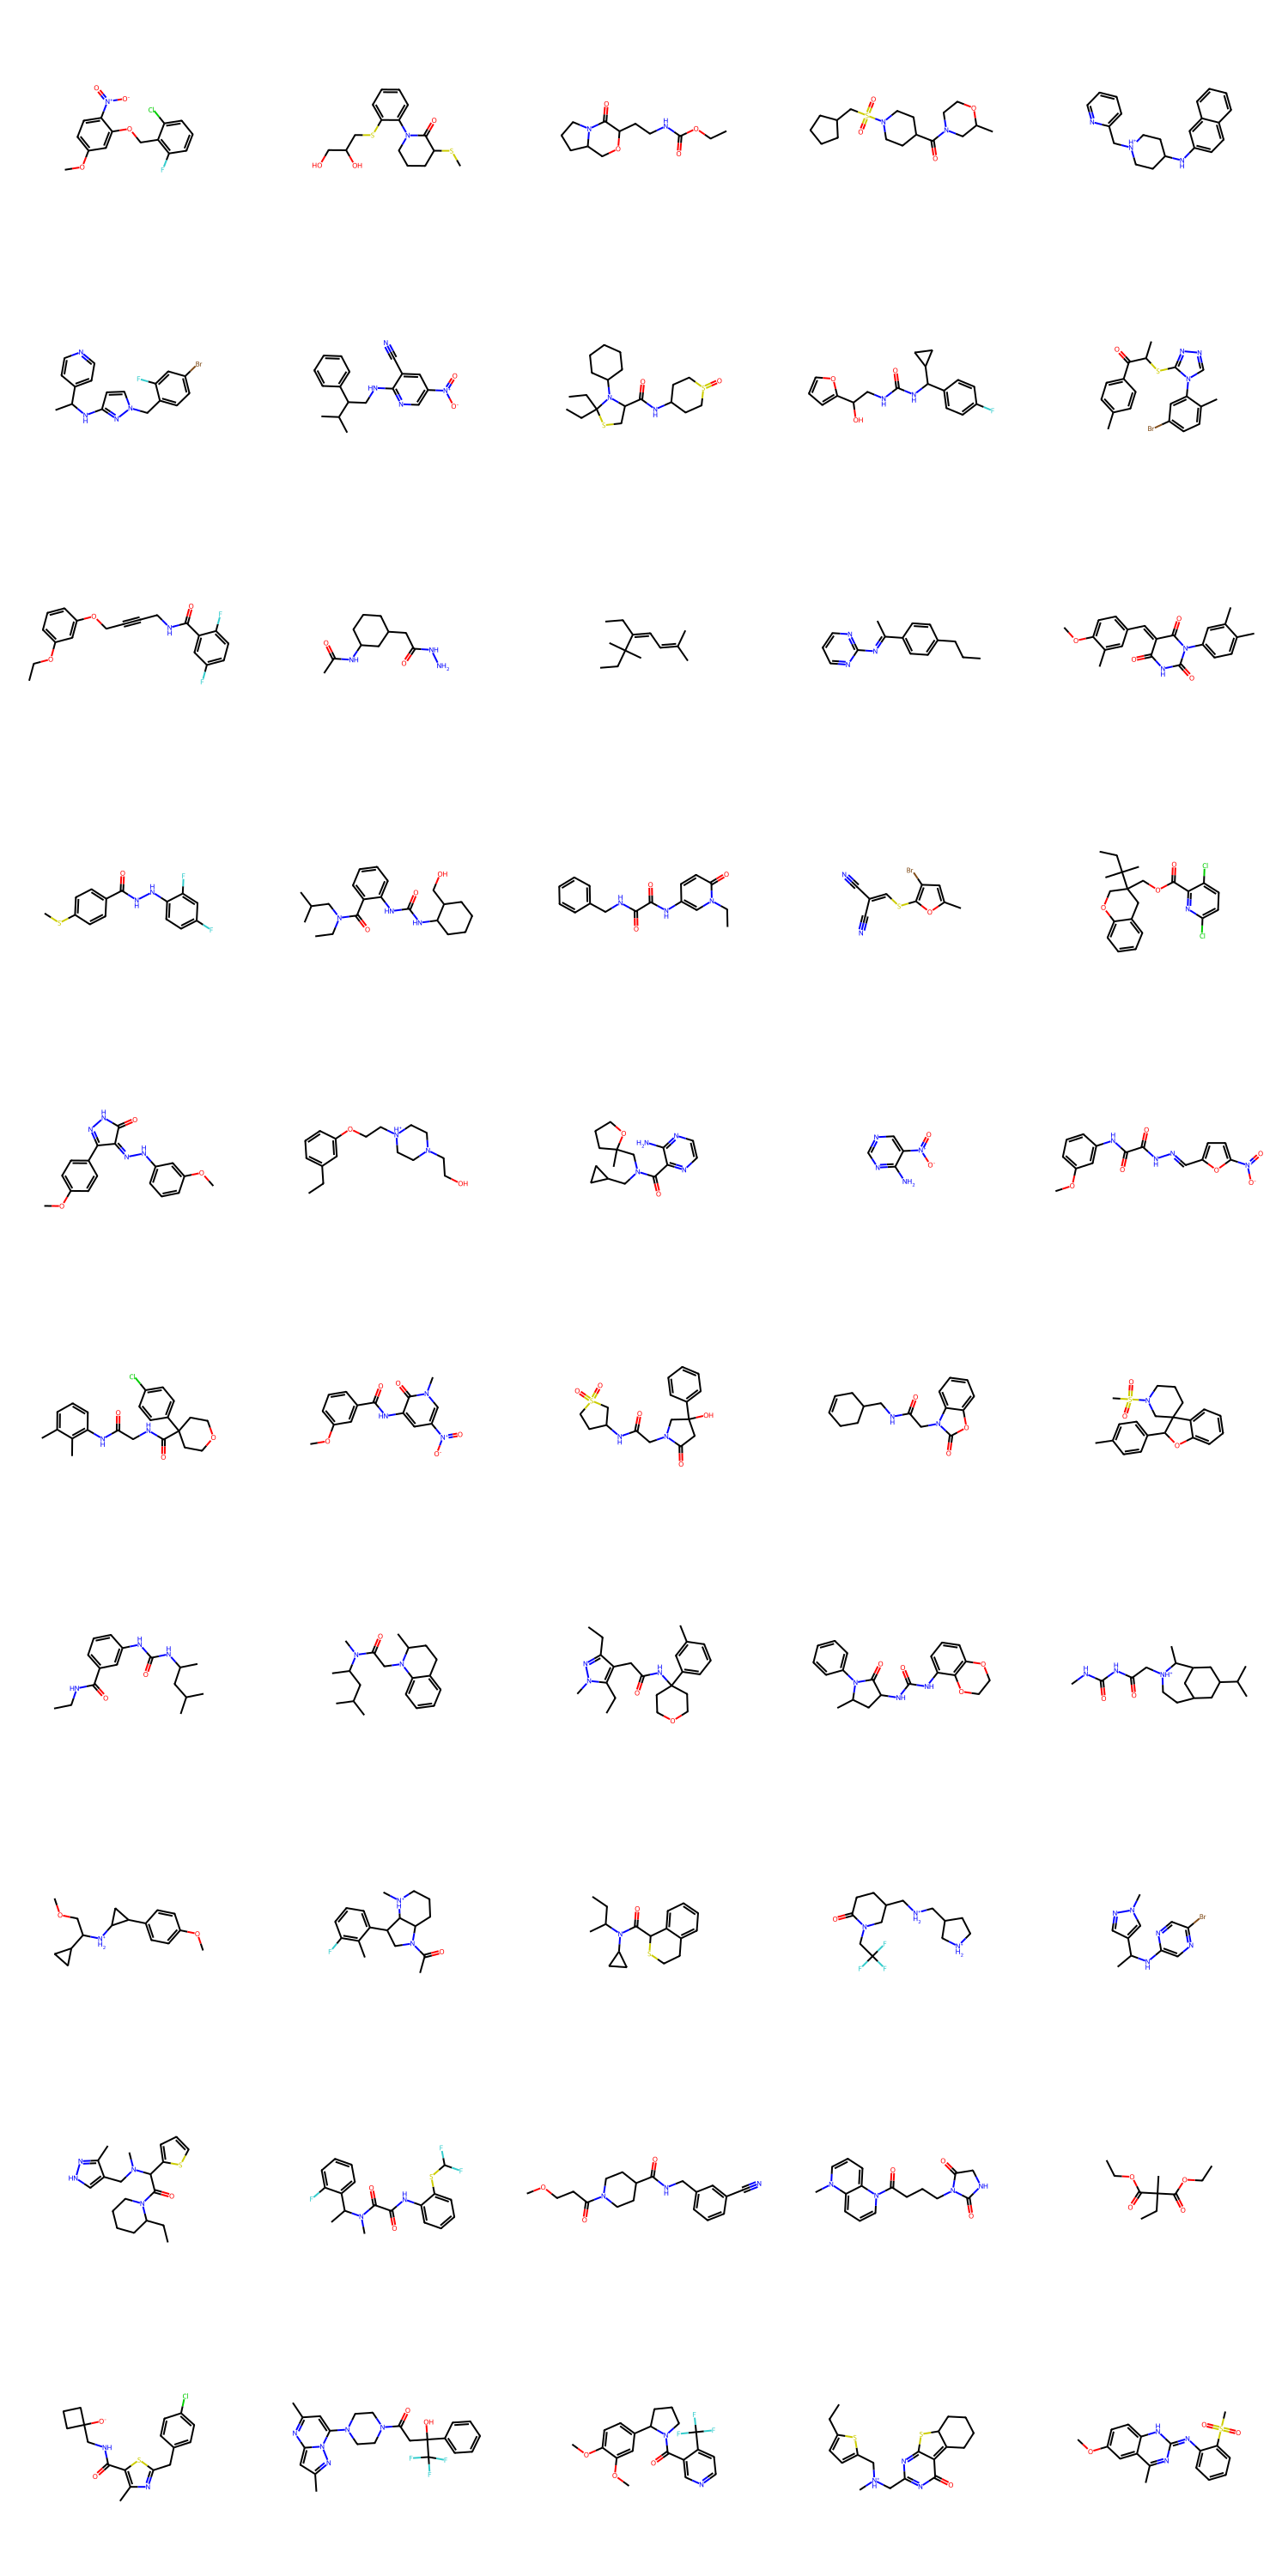

In [25]:
visualize_smiles_grid(mol_data['smiles'].tolist())

In [28]:
mol_data[mol_data['QED'] > 0.945]

,smiles,SA,logP,QED,weight,n_rings
1845,Cc1ccc(NC(C)C(=O)N2Cc3cccnc3C2)cc1C,2.725791,3.04124,0.946361,295.386,3
2624,CC(NC(=O)c1ccco1)C(=O)N1CCc2sccc2C1C,3.137224,2.60530,0.945986,318.398,3
3962,CN(c1cncc(-c2c(F)cccc2F)n1)C1CCCCC1[NH3+],3.889689,2.41110,0.945033,319.379,3
5217,Cc1nc(NC(=O)C(C)n2ccc(C(F)(F)F)n2)sc1C,2.970406,3.17494,0.945355,318.324,2
6344,CCc1nnc(C(=O)Nc2cccc(Br)c2)s1,2.097424,3.11530,0.947207,312.192,2
6734,Cc1nc(C)c(C(=O)Nc2cccnc2N2CCCC2)s1,2.154549,3.00744,0.946619,302.403,3
7100,COc1ccc(C(N)c2cncc(Br)c2)cc1,2.481128,2.90080,0.946237,293.164,2
8617,O=C(Nc1ccc(N2CCCC2=O)cc1Cl)c1ccncc1,1.979387,3.11410,0.946270,315.760,3
8845,CNc1nc(C)ncc1C(=O)N1CCCC1c1ccc(F)cc1,2.741384,2.94312,0.946115,314.364,3
9511,CCC1CN(C(=O)c2ccc[nH]c2=O)CCC1c1ccccc1,2.954823,3.03080,0.947141,310.397,3


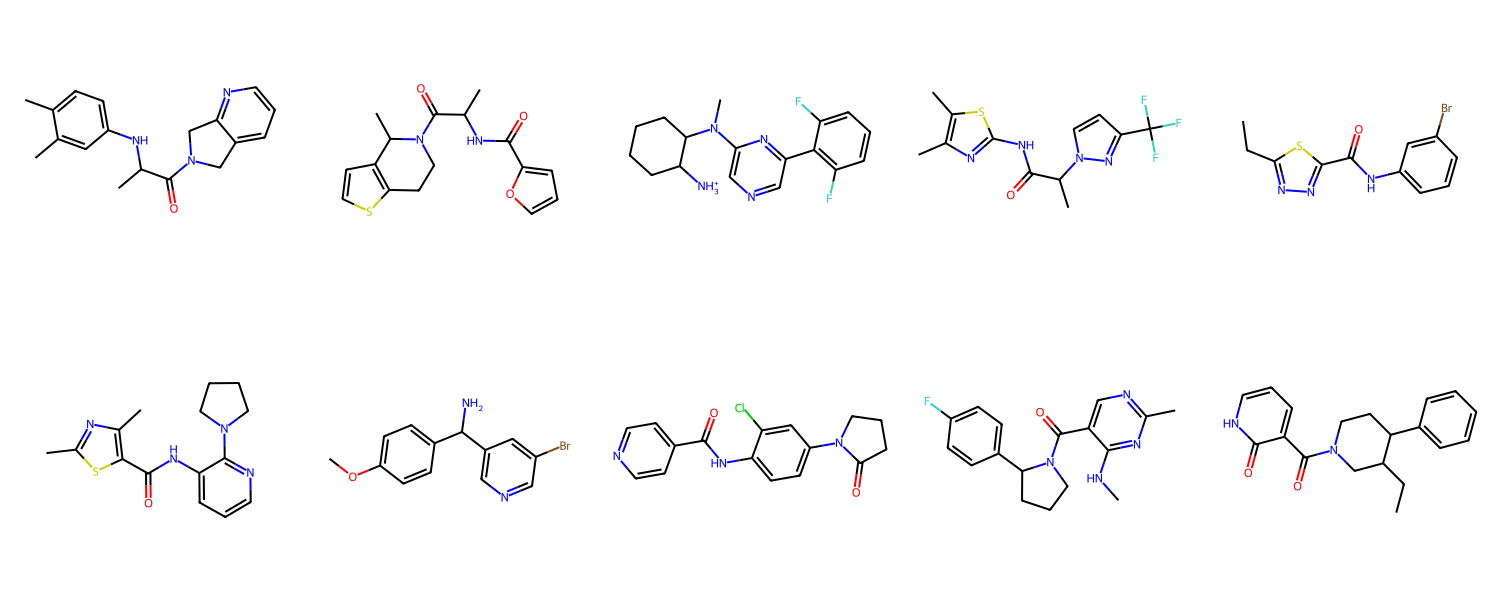

In [29]:
visualize_smiles_grid(mol_data[mol_data['QED'] > 0.945]['smiles'].tolist())